In [732]:
import pandas as pd
import numpy as np

データの読み込み

In [733]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [734]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


学習データを特徴量と目的変数に分ける

In [735]:
train_x = train.drop(['Survived'],axis=1)
train_y = train['Survived']

#テストデータは特徴量のみなのでそのまま
test_x = test.copy()

データの揺れ(型)を確認する

In [736]:
train_x.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

データの欠損値の確認をする

In [737]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [738]:
test_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

####  変数の削除をする

In [739]:
#変数PassengeerIdを削除する
train_x = train_x.drop(['PassengerId'],axis=1)
test_x = test_x.drop(['PassengerId'],axis=1)

## データの確認

年齢の分布を確認

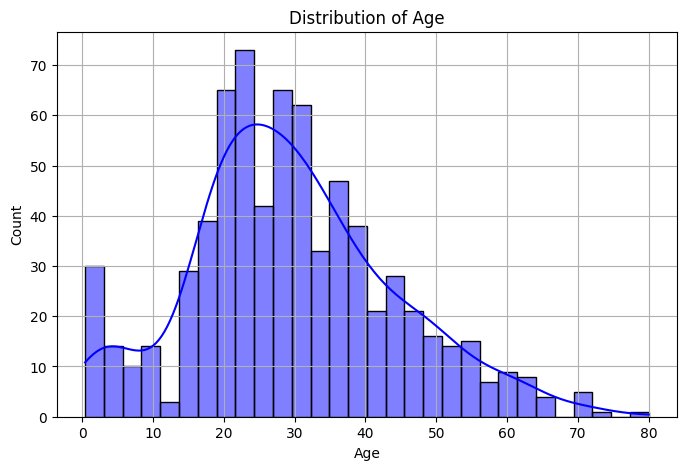

In [740]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(train_x['Age'], bins=30, kde=True, color='blue')  # KDE=Trueで確率密度関数も描画
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.grid(True)
plt.show()

NaNが2つ以上ある行を確認

In [741]:
nan_rows = train_x[train_x.isna().sum(axis=1) >= 2]
print(nan_rows)
#3個あるものはなかった

     Pclass                                      Name     Sex  Age  SibSp  \
5         3                          Moran, Mr. James    male  NaN      0   
17        2              Williams, Mr. Charles Eugene    male  NaN      0   
19        3                   Masselmani, Mrs. Fatima  female  NaN      0   
26        3                   Emir, Mr. Farred Chehab    male  NaN      0   
28        3             O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0   
..      ...                                       ...     ...  ...    ...   
859       3                          Razi, Mr. Raihed    male  NaN      0   
863       3         Sage, Miss. Dorothy Edith "Dolly"  female  NaN      8   
868       3               van Melkebeke, Mr. Philemon    male  NaN      0   
878       3                        Laleff, Mr. Kristo    male  NaN      0   
888       3  Johnston, Miss. Catherine Helen "Carrie"  female  NaN      1   

     Parch      Ticket     Fare Cabin Embarked  
5        0      330877   8

ただ乗りしている人がいる！？

In [742]:
fare_zero_rows = train_x[train_x['Fare'] == 0]
print(fare_zero_rows)

     Pclass                              Name   Sex   Age  SibSp  Parch  \
179       3               Leonard, Mr. Lionel  male  36.0      0      0   
263       1             Harrison, Mr. William  male  40.0      0      0   
271       3      Tornquist, Mr. William Henry  male  25.0      0      0   
277       2       Parkes, Mr. Francis "Frank"  male   NaN      0      0   
302       3   Johnson, Mr. William Cahoone Jr  male  19.0      0      0   
413       2    Cunningham, Mr. Alfred Fleming  male   NaN      0      0   
466       2             Campbell, Mr. William  male   NaN      0      0   
481       2  Frost, Mr. Anthony Wood "Archie"  male   NaN      0      0   
597       3               Johnson, Mr. Alfred  male  49.0      0      0   
633       1     Parr, Mr. William Henry Marsh  male   NaN      0      0   
674       2        Watson, Mr. Ennis Hastings  male   NaN      0      0   
732       2              Knight, Mr. Robert J  male   NaN      0      0   
806       1            An

## 特徴量の作成

### 行のNaNの数の特徴量を作成する

In [743]:
#train_x["num_missing"] = train_x.isna().sum(axis=1)
#test_x["num_missing"] = test_x.isna().sum(axis=1)

### Fareが０の特徴量の列の作成

In [744]:
#使えなかった
train_x["fare_zero"] = (train_x['Fare'] == 0).astype(int)
test_x["fare_zero"] = (test_x['Fare'] == 0).astype(int)

### Cabinから新たな特徴量を作成する

In [745]:
train_x['Cabin_Deck'] = train_x['Cabin'].astype(str).str[0]
train_x.loc[train_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

test_x['Cabin_Deck'] = test_x['Cabin'].astype(str).str[0]
test_x.loc[test_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

print(train_x['Cabin_Deck'])

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_Deck, Length: 891, dtype: object


### Name列からタイトルを抽出

In [746]:
# Name列からタイトルを抽出
train_x['Title'] = train_x['Name'].str.extract(r',\s*([^\.]+)\.')
test_x['Title'] = test_x['Name'].str.extract(r',\s*([^\.]+)\.')

# 稀なタイトルを結合
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
               'Jonkheer', 'Dona', 'Mlle', 'Mme', 'Ms', 'the Countess']
train_x['Title'] = train_x['Title'].replace(rare_titles,'Rare')
test_x['Title'] = test_x['Title'].replace(rare_titles,'Rare')

print(train_x['Title'].value_counts())
print(test_x['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: count, dtype: int64


### 家族人数の特徴量の作成をする

In [747]:
#家族人数の合計
train_x['FamilySize'] = train_x['SibSp'] + train_x['Parch'] + 1
test_x['FamilySize'] = test_x['SibSp'] + test_x['Parch'] + 1

### 料金/家族人数の特徴量を作成する

In [748]:
train_x['FarePerFamilyMember'] = train_x['Fare'] / train_x['FamilySize']
test_x['FarePerFamilyMember'] = test_x['Fare'] / train_x['FamilySize']

train_x['FarePerFamilyMember']

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: FarePerFamilyMember, Length: 891, dtype: float64

### LastNameの特徴量を作成する

In [749]:
#姓(LastName)を抽出して新しい列に追加
train_x['LastName'] = train['Name'].str.split(',').str[0]
test_x['LastName'] = test['Name'].str.split(',').str[0]

In [750]:
train_x['LastName'].value_counts()

LastName
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

### LastNameからSameNameの列を作成する

In [751]:
#LastNameの登場回数を記録
train_x['Same_Name'] = train_x['LastName'].map(train_x['LastName'].value_counts())
test_x['Same_Name'] = test_x['LastName'].map(test_x['LastName'].value_counts())

### Ticketから特徴量を作る

In [752]:
def classify_ticket(ticket):
    #  1. Numeric（すべて数値）
    if ticket.isdigit():
        return "Numeric"
    
    #  2. SpecialChar（"/" や "." を含む場合）
    elif "/" in ticket or "." in ticket:
        return "SpecialChar"
    
    #  3. Alphanumeric（英字と数字の両方を含む場合）
    elif any(char.isdigit() for char in ticket) and any(char.isalpha() for char in ticket):
        return "Alphanumeric"
    
    #  4. Unknown（どれにも当てはまらない場合）
    else:
        return "Unknown"

In [753]:
train_x["Ticket_Tpye"] = train_x["Ticket"].apply(classify_ticket)
test_x["Ticket_Tpye"] = test_x["Ticket"].apply(classify_ticket)
print(train_x['Ticket_Tpye'].value_counts())

Ticket_Tpye
Numeric         661
SpecialChar     150
Alphanumeric     76
Unknown           4
Name: count, dtype: int64


In [754]:
#正しく分類できているか確認
train_x[train_x["Ticket_Tpye"] == "SpecialChar"]["Ticket"]

0             A/5 21171
2      STON/O2. 3101282
12            A/5. 2151
33           C.A. 24579
37           A./5. 2152
             ...       
866       SC/PARIS 2149
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 150, dtype: object

### 子どもだけの特徴量を作成したい

In [755]:
#妻から夫を算出
filtered_rows = train_x[(train_x["Title"] == "Mrs") & (train_x["SibSp"] == 1)]
print(filtered_rows)

     Pclass                                               Name     Sex   Age  \
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
9         2                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
18        3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0   
25        3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0   
..      ...                                                ...     ...   ...   
849       1       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female   NaN   
854       2      Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0   
856       1         Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0   
871       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0   
874       2              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0   

     SibSp  Parch     Ticket      Fare 

### 子か親の欄を2人いる時は親だと仮定して特徴量の作成

In [756]:
#train_x['Parch_child'] = (train_x['Parch']==2) & ((train_x['Title'] == 'Miss') | (train_x['Parch'] == 'Master'))
#train_x

### Ageデータの結合

In [757]:
train_age_data = pd.read_csv('train_age_data.csv')
test_age_data = pd.read_csv('test_age_data.csv')

train_x = pd.concat([train_x,train_age_data['Predict_Age']],axis=1)
test_x = pd.concat([test_x,test_age_data['Predict_Age']],axis=1)

### Ageを二値に分類

In [758]:
train_x['Age_missing'] = train_x['Age'].isnull().astype(int)
test_x['Age_missing'] = test_x['Age'].isnull().astype(int)

### 最終データ確認

In [759]:
train_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_zero,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye,Predict_Age,Age_missing
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,NaN,Mr,2,3.62500,Braund,2,SpecialChar,22.0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,Mrs,2,35.64165,Cumings,1,Alphanumeric,38.0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,NaN,Miss,1,7.92500,Heikkinen,1,SpecialChar,26.0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C,Mrs,2,26.55000,Futrelle,2,Numeric,35.0,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,NaN,Mr,1,8.05000,Allen,2,Numeric,35.0,0


In [760]:
test_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_zero,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye,Predict_Age,Age_missing
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN,Mr,1,3.91460,Kelly,1,Numeric,34.5,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,NaN,Mrs,2,3.50000,Wilkes,1,Numeric,47.0,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN,Mr,1,9.68750,Myles,1,Numeric,62.0,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN,Mr,1,4.33125,Wirz,1,Numeric,27.0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,NaN,Mrs,3,12.28750,Hirvonen,1,Numeric,22.0,0


### 変更した特徴量の削除

In [761]:
#変数を削除する
train_x = train_x.drop(['Name','Ticket','LastName','Cabin','Parch' ,'Age_missing','fare_zero'],axis=1)
test_x = test_x.drop(['Name','Ticket','LastName','Cabin','Parch','Age_missing','fare_zero'],axis=1)

### label enocdingを行う

In [762]:
from sklearn.preprocessing import LabelEncoder

for c in ['Sex','Embarked','Ticket_Tpye','Title','Cabin_Deck']:
    #学習データをどう変換するかを決める
    le = LabelEncoder()
    le.fit(train_x[c].fillna('NA')) #欠損値の変換

    train_x[c] = le.transform(train_x[c].fillna('NA'))
    test_x[c] = le.transform(test_x[c].fillna('NA'))

In [763]:
train_x.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,Same_Name,Ticket_Tpye,Predict_Age,Age_missing
0,3,1,22.0,1,7.2500,3,7,2,2,3.62500,2,2,22.0,0
1,1,0,38.0,1,71.2833,0,2,3,2,35.64165,1,0,38.0,0
2,3,0,26.0,0,7.9250,3,7,1,1,7.92500,1,2,26.0,0
3,1,0,35.0,1,53.1000,3,2,3,2,26.55000,2,1,35.0,0
4,3,1,35.0,0,8.0500,3,7,2,1,8.05000,2,1,35.0,0


### モデルの評価

In [764]:
from sklearn.metrics import log_loss,accuracy_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

#各foldのスコアを保持するリスト
scores_accuracy = []
scores_logloss = []

# クロスバリデーションデータ
# 学習データを4つに分割し，うち1つをバリデーションデータとすることを，バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx,va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x,va_x = train_x.iloc[tr_idx],train_x.iloc[va_idx]
    tr_y,va_y = train_y.iloc[tr_idx],train_y.iloc[va_idx]

    #モデルの学習を行う
    model = XGBClassifier(n_estimators=20,random_state=71,max_depth=3,min_child_weight=5.0)
    model.fit(tr_x,tr_y)

    #バリデーションデータに予測値を確率で算出する
    va_pred = model.predict_proba(va_x)[:,1]

    #バリデーションデータでのスコアを計算する
    logloss = log_loss(va_y,va_pred)
    accuracy = accuracy_score(va_y,va_pred > 0.5)

    #そのfoldスコアを保存する
    scores_logloss.append(logloss)
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
logloss = np.mean(scores_logloss)
accuracy = np.mean(scores_accuracy)
print(f'logloss: {logloss:.4f},accuracy: {accuracy:.4f}')

logloss: 0.4121,accuracy: 0.8249


### モデルのチューニング

In [765]:
import itertools

# チューニング候補とするパラメータを準備する
param_space = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_child_weight': [1.0,2.0,3.0, 4.0, 5.0, 6.0]
}

# 探索するハイパーパラメータの組み合わせ
param_combinations = itertools.product(param_space['max_depth'], param_space['min_child_weight'])

# 各パラメータの組み合わせ、それに対するスコアを保存するリスト
params = []
scores = []

# 各パラメータの組み合わせごとに、クロスバリデーションで評価を行う
for max_depth, min_child_weight in param_combinations:

    score_folds = []
    # クロスバリデーションを行う
    # 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
    kf = KFold(n_splits=4, shuffle=True, random_state=123456)
    for tr_idx, va_idx in kf.split(train_x):
        # 学習データを学習データとバリデーションデータに分ける
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

        # モデルの学習を行う
        model = XGBClassifier(n_estimators=20, random_state=71,
                              max_depth=max_depth, min_child_weight=min_child_weight)
        model.fit(tr_x, tr_y)

        # バリデーションデータでのスコアを計算し、保存する
        va_pred = model.predict_proba(va_x)[:, 1]
        logloss = log_loss(va_y, va_pred)
        score_folds.append(logloss)

    # 各foldのスコアを平均する
    score_mean = np.mean(score_folds)

    # パラメータの組み合わせ、それに対するスコアを保存する
    params.append((max_depth, min_child_weight))
    scores.append(score_mean)

# 最もスコアが良いものをベストなパラメータとする
best_idx = np.argsort(scores)[0]
best_param = params[best_idx]
print(f'max_depth: {best_param[0]}, min_child_weight: {best_param[1]}')

max_depth: 3, min_child_weight: 5.0


### 各Foldのスコアの変動を可視化

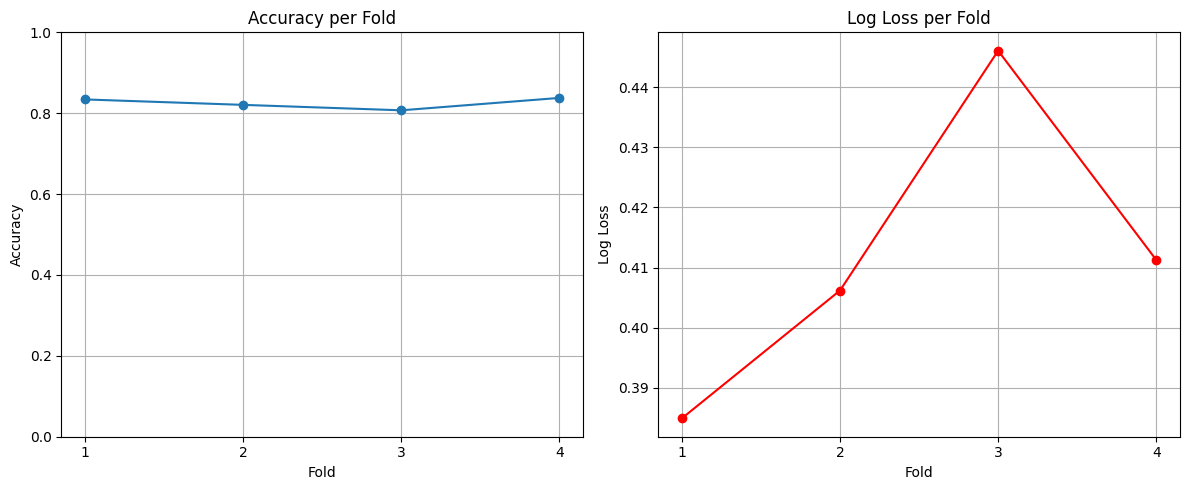

In [766]:
import matplotlib.pyplot as plt
import numpy as np

# 各Foldのスコアの推移
folds = np.arange(1, len(scores_accuracy) + 1)

plt.figure(figsize=(12, 5))

# Accuracyの推移
plt.subplot(1, 2, 1)
plt.plot(folds, scores_accuracy, marker='o', linestyle='-', label="Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy per Fold")
plt.xticks(folds)
plt.ylim(0, 1)
plt.grid(True)

# Log Lossの推移
plt.subplot(1, 2, 2)
plt.plot(folds, scores_logloss, marker='o', linestyle='-', color='red', label="Log Loss")
plt.xlabel("Fold")
plt.ylabel("Log Loss")
plt.title("Log Loss per Fold")
plt.xticks(folds)
plt.grid(True)

plt.tight_layout()
plt.show()


### 重要な特徴量の可視化

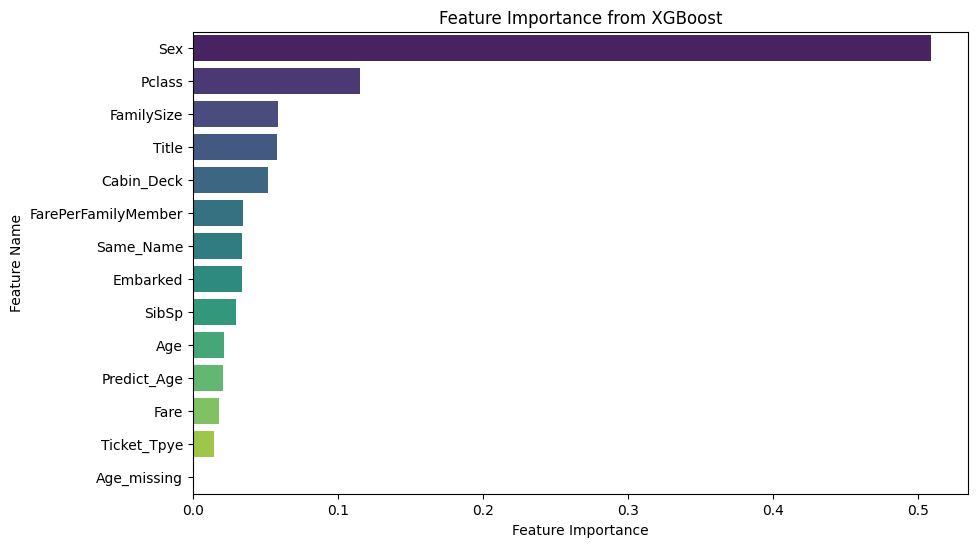

In [767]:
# 特徴量の重要度を取得
feature_importances = model.feature_importances_
features = train_x.columns

# データフレーム化
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 可視化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance from XGBoost')
plt.show()


      Feature  Importance
1         Sex    0.509012
0      Pclass    0.115614
8  FamilySize    0.058800
7       Title    0.058103
6  Cabin_Deck    0.052082


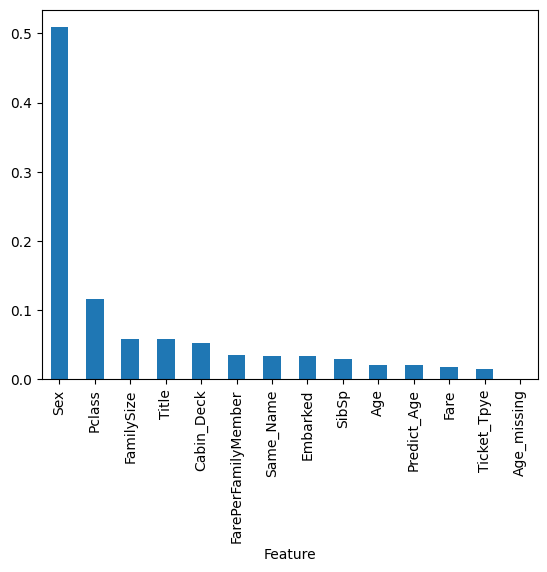

In [768]:
# 上位の特徴量を表示
print(importance_df.head())

# 特徴量の重要度をプロット
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.show()

### モデルの作成

In [769]:
from xgboost import XGBClassifier

# モデルの作成および学習データを与えての学習
model = XGBClassifier(n_estimators=20, random_state=71,max_depth=3,min_child_weight=5.0)
model.fit(train_x, train_y)

# テストデータの予測値を確率で出力する
pred = model.predict_proba(test_x)[:, 1]

# テストデータの予測値を二値に変換する
pred_label = np.where(pred > 0.5, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_label})
#submission.to_csv('submission_six.csv', index=False)

# 数値の変更忘れずに！！！

In [770]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
